In [1]:
import pandas as pd

df_songs = pd.read_json('dataset/tracks.json')
df_songs.columns

Index(['id', 'id_artist', 'title', 'featured_artists', 'primary_artist',
       'language', 'album', 'swear_IT', 'swear_EN', 'swear_IT_words',
       'swear_EN_words', 'year', 'month', 'day', 'n_sentences', 'n_tokens',
       'char_per_tok', 'avg_token_per_clause', 'bpm', 'rolloff', 'flux', 'rms',
       'flatness', 'spectral_complexity', 'pitch', 'loudness', 'album_name',
       'album_release_date', 'album_type', 'disc_number', 'track_number',
       'duration_ms', 'explicit', 'popularity', 'id_album', 'lyrics',
       'streams@1month'],
      dtype='object')

In [37]:
df_songs['year'][100]

np.float64(2019.0)

In [55]:
import matplotlib.pyplot as plt

def plot_distrib(df, feature):
    feat = df[feature].dropna()
    if feat.empty: return

    plt.figure(figsize=(10, 5))
    # create a barplot of binned counts for the numeric feature
    counts = feat.value_counts(bins=30).sort_index()
    bin_centers = [(interval.left + interval.right) / 2 for interval in counts.index]
    bar_width = (counts.index[0].right - counts.index[0].left) * 0.9 if len(counts) > 0 else 0.8
    plt.bar(bin_centers, counts.values, width=bar_width, alpha=0.7, color='C0')
    # reduce number of x-ticks for readability
    step = max(1, len(bin_centers) // 10)
    plt.xticks(bin_centers[::step], rotation=45)
    plt.title(f'{feature} distribution')
    plt.xlabel(feature)
    plt.ylabel('Counts')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(df[feature].min(), df[feature].max())
    plt.yscale('log')
    plt.show()

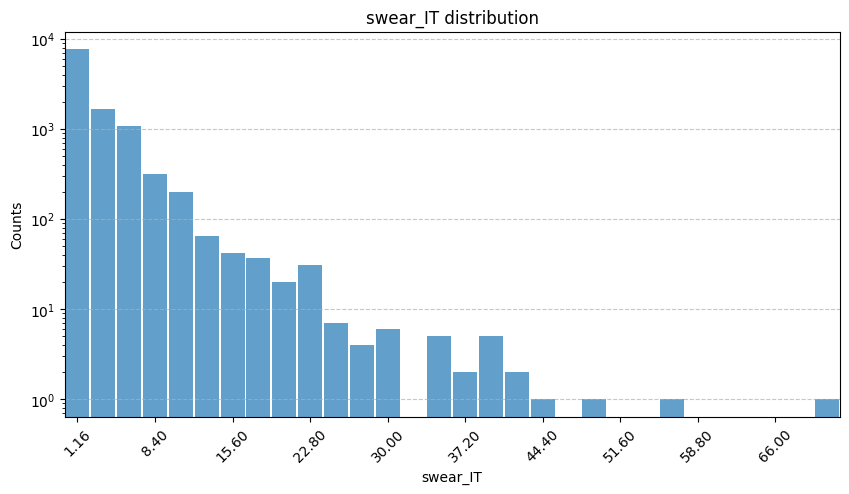

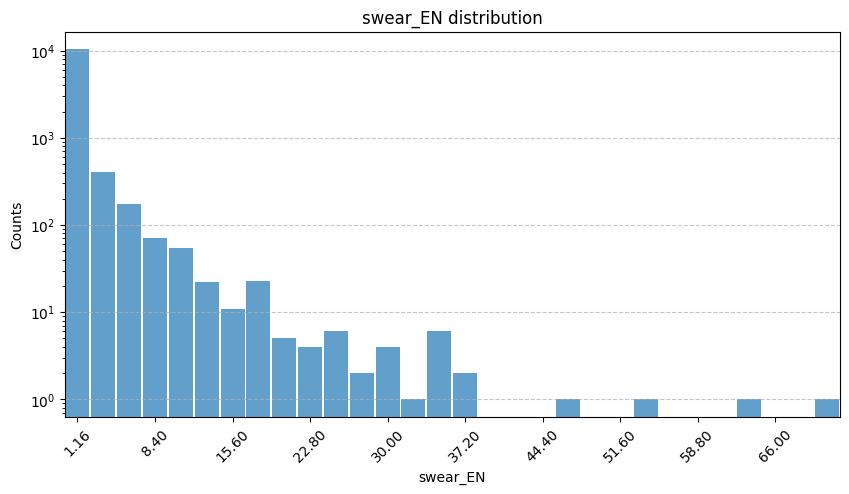

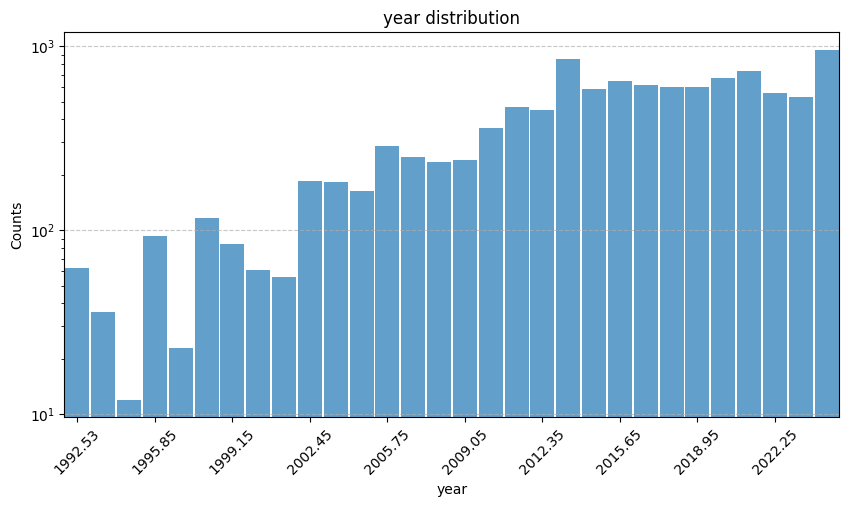

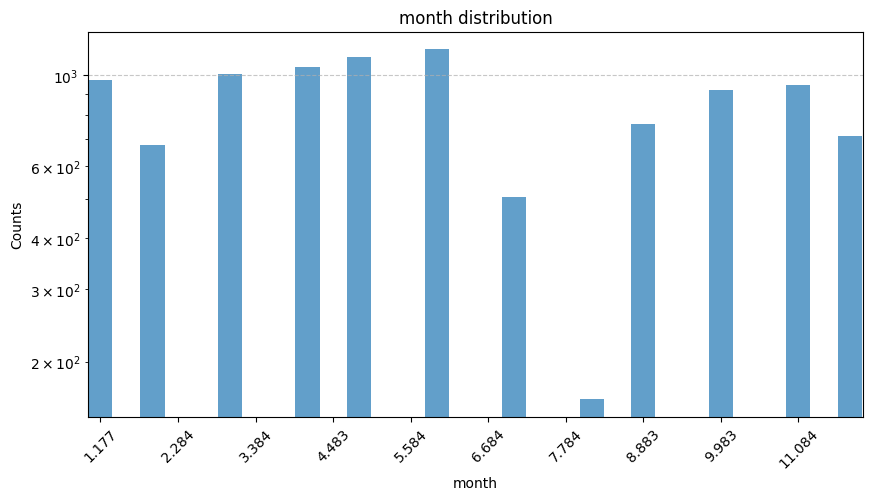

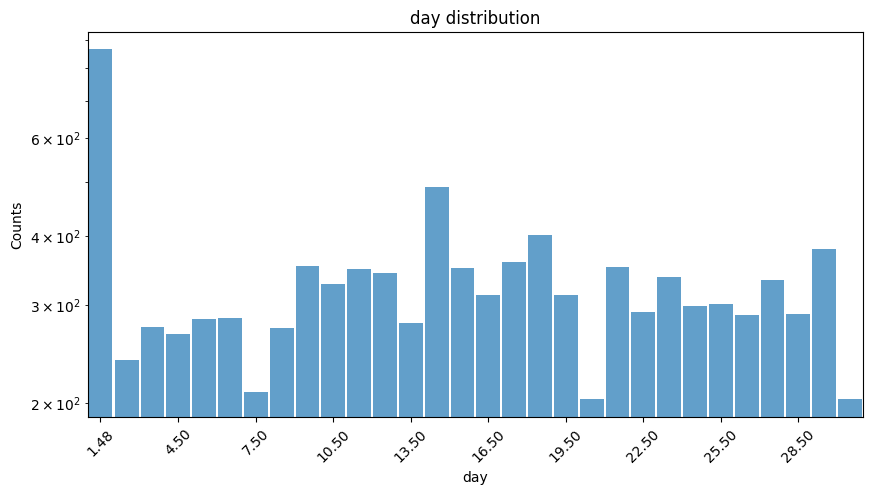

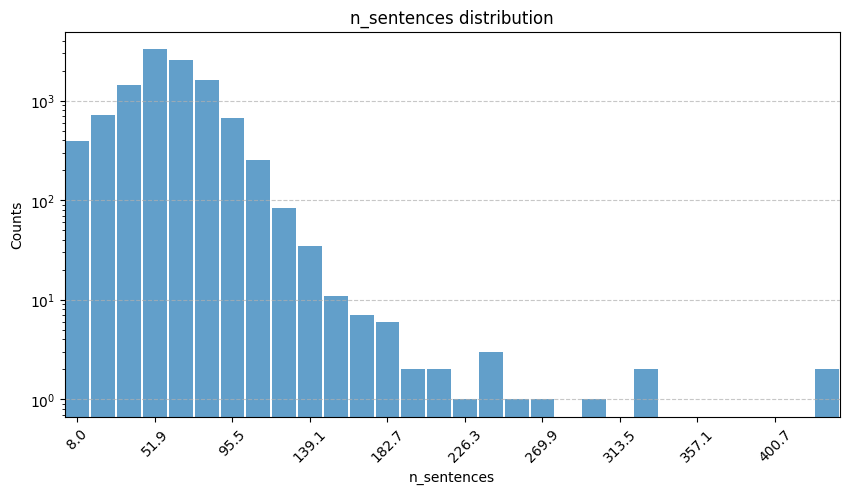

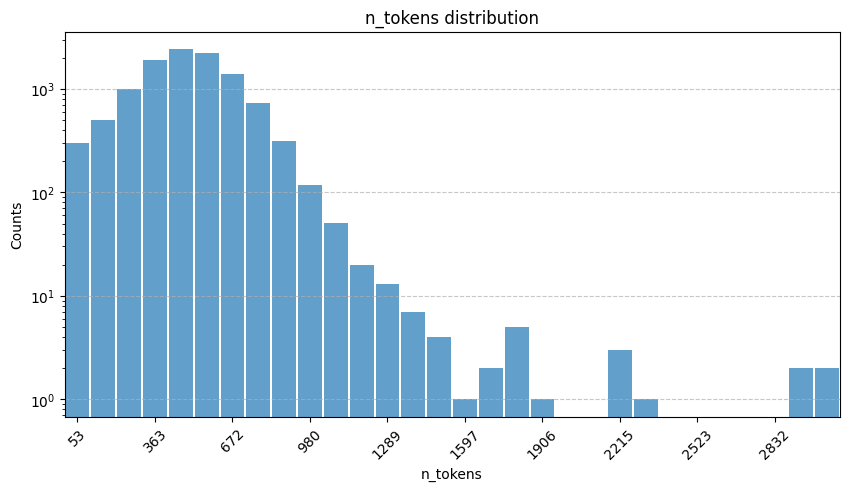

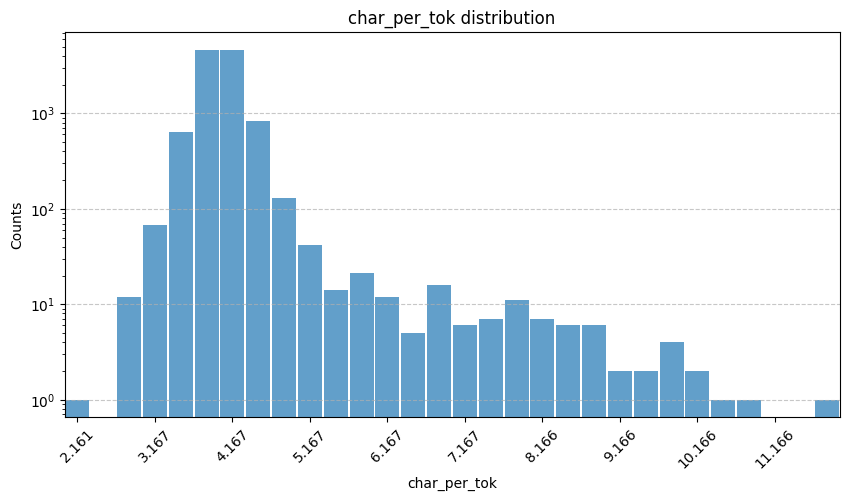

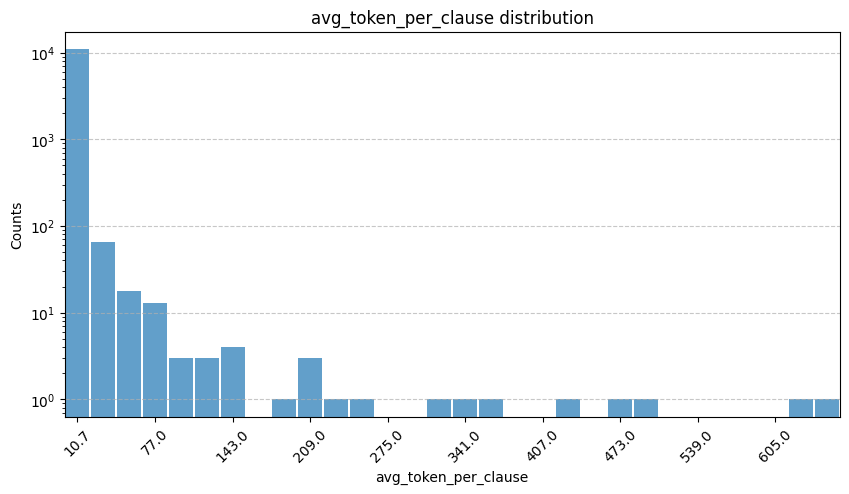

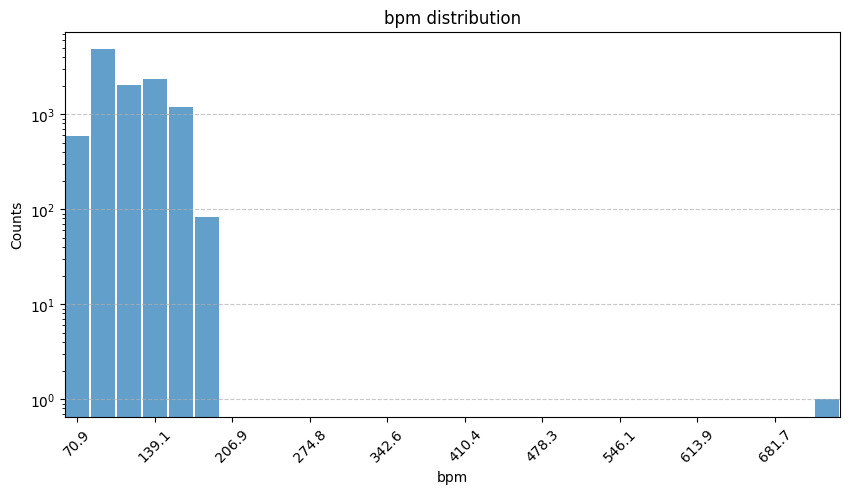

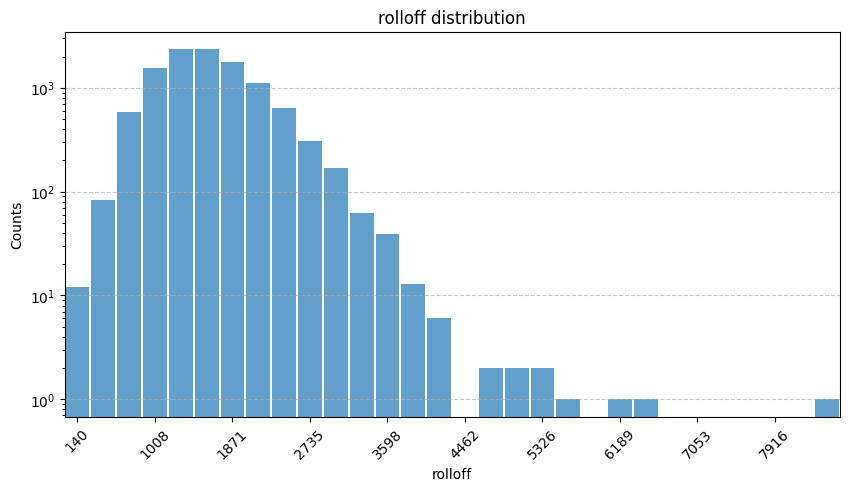

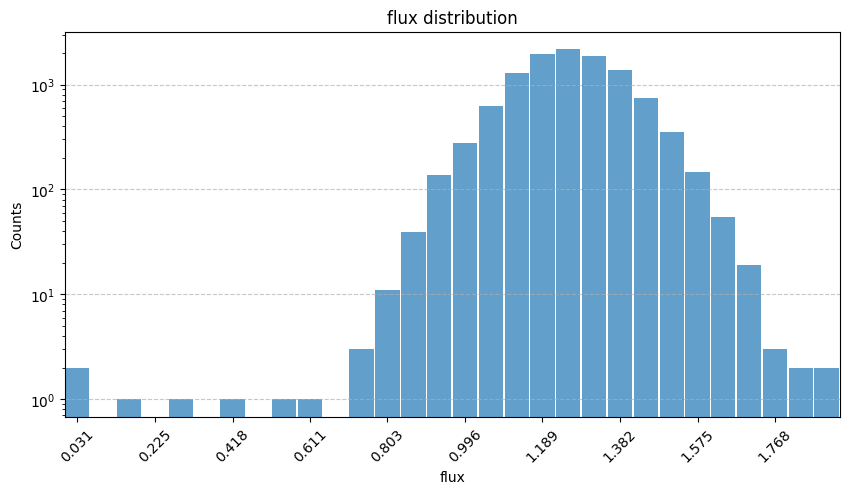

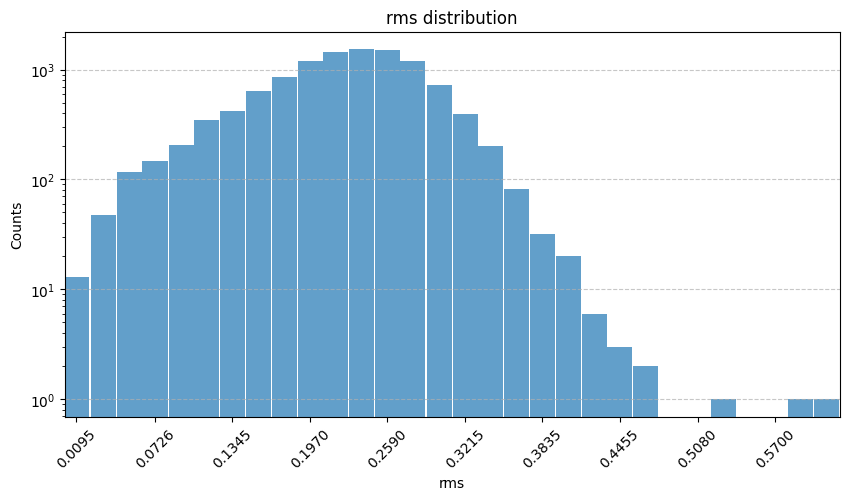

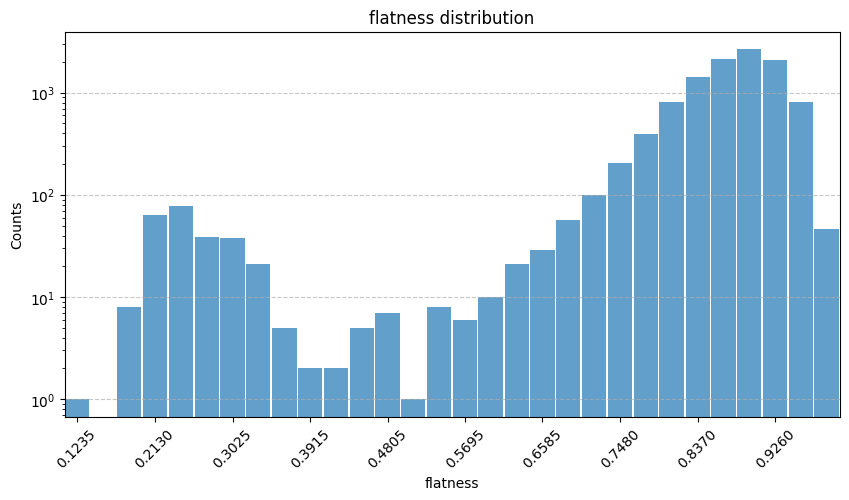

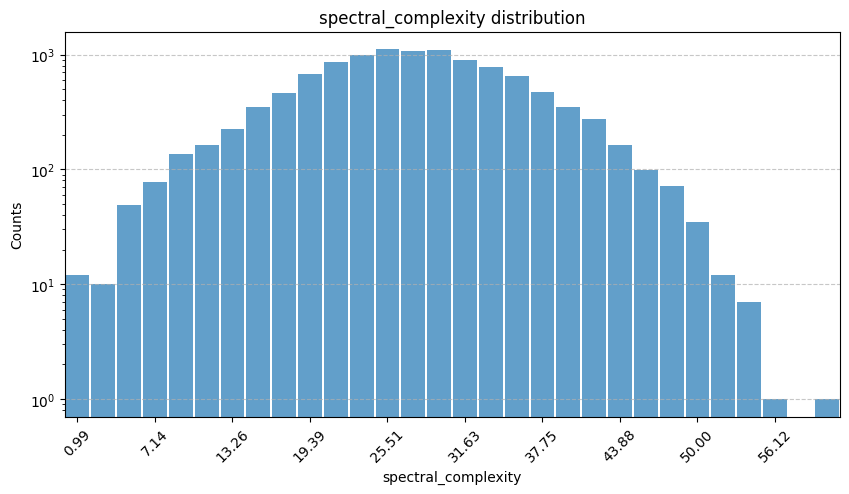

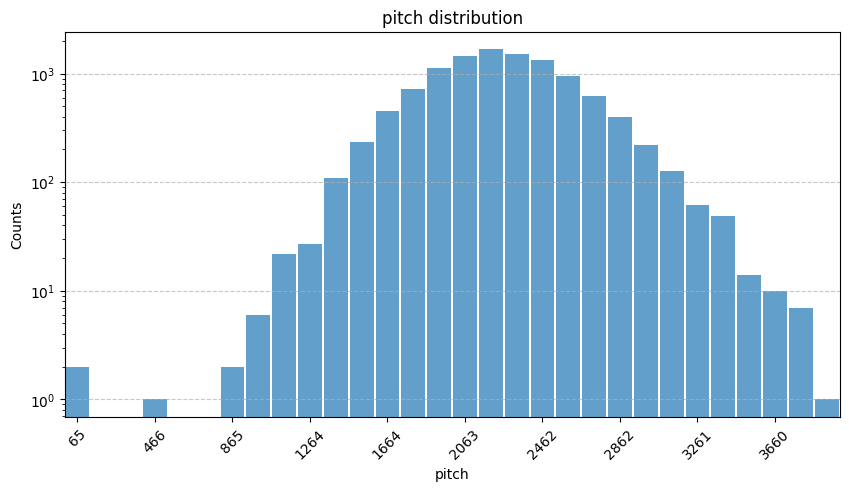

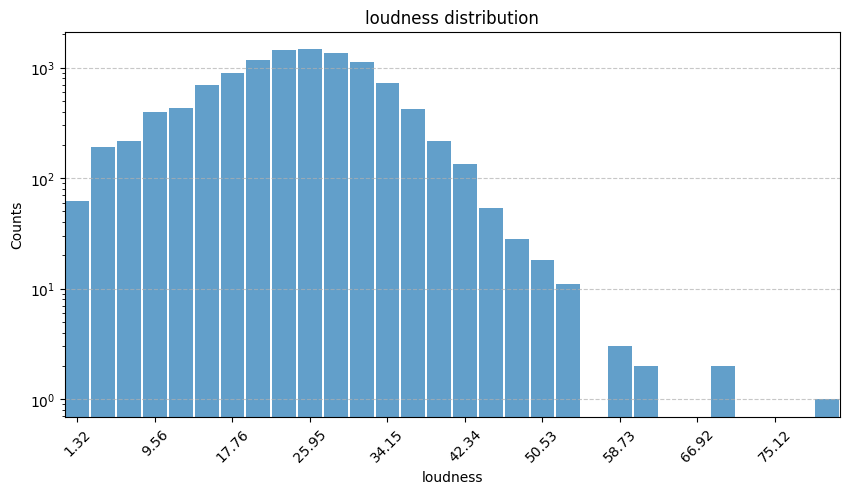

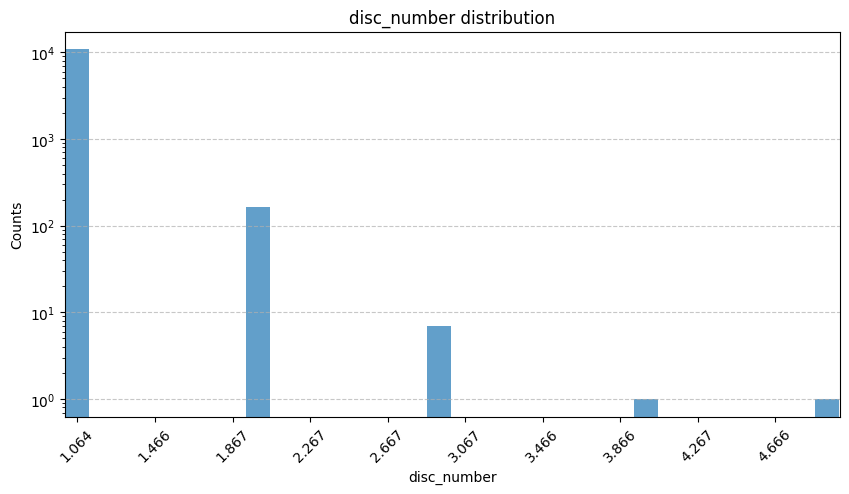

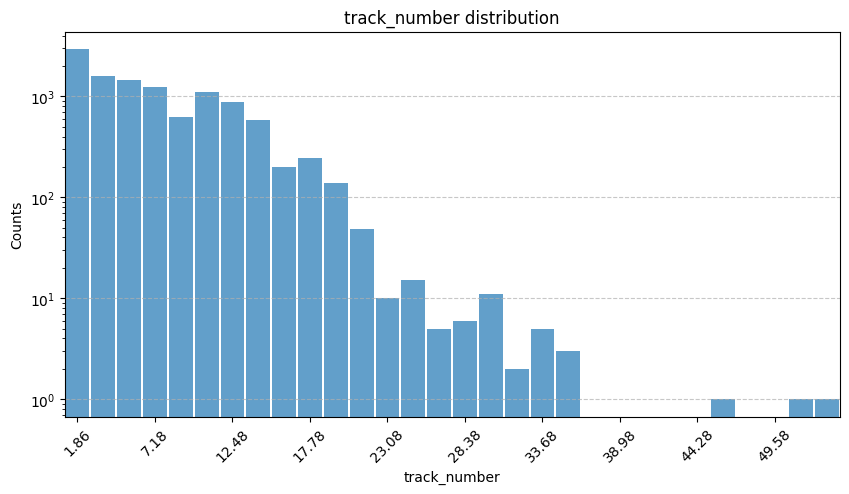

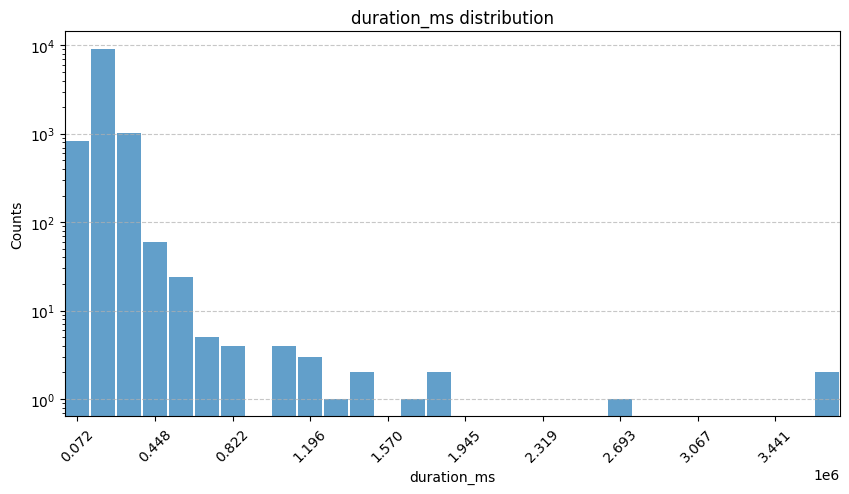

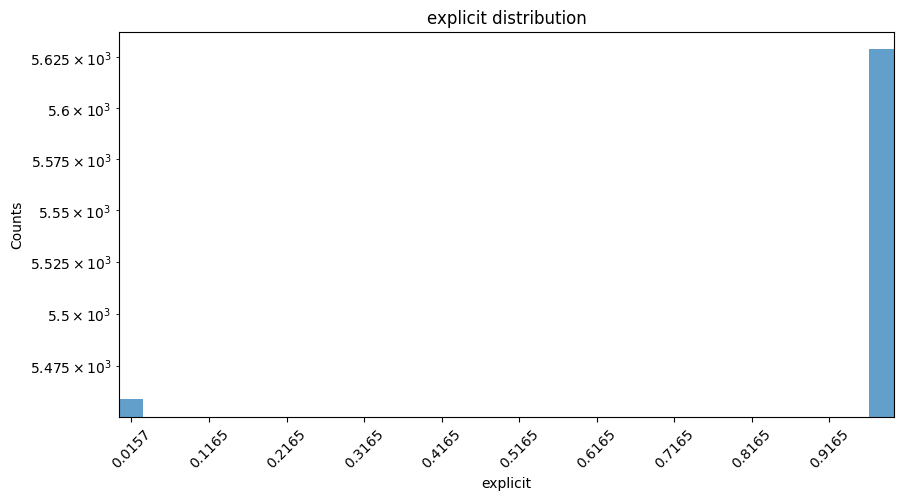

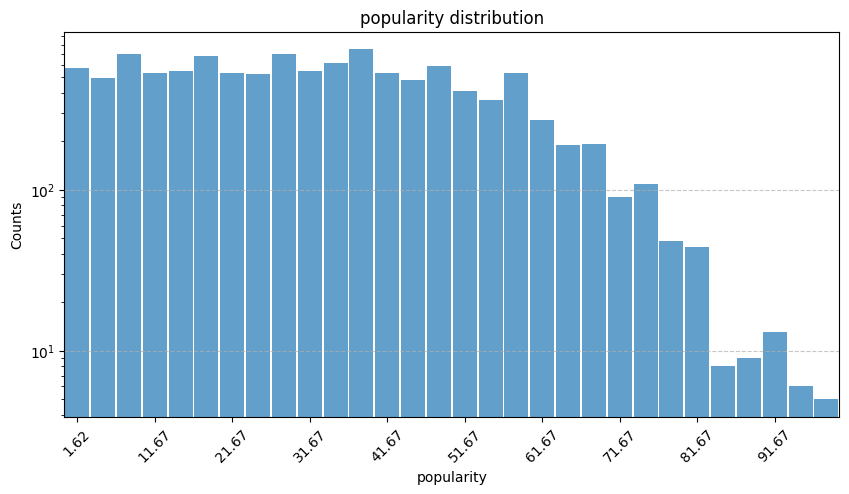

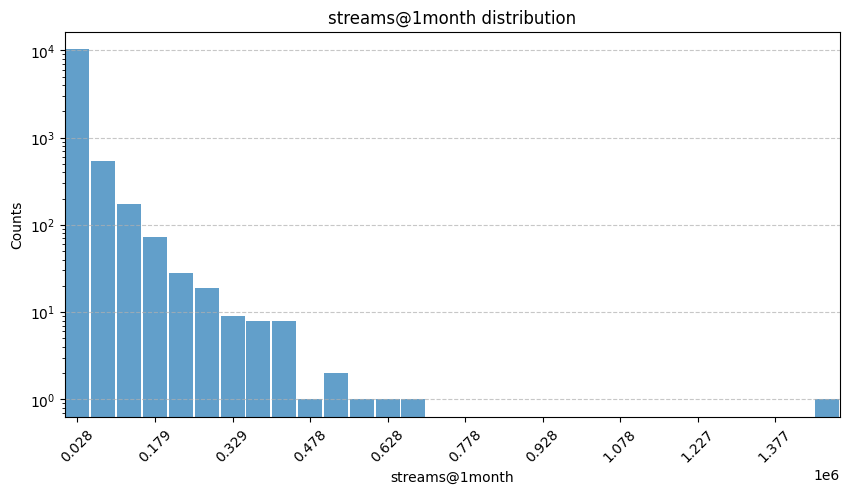

In [56]:
for feat in df_songs.columns:
    if pd.api.types.is_numeric_dtype(df_songs[feat]):
        plot_distrib(df_songs, feat)

In [57]:
df_artists = pd.read_xml('dataset/artists.xml')
df_artists.columns

Index(['id_author', 'name', 'gender', 'birth_date', 'birth_place',
       'nationality', 'description', 'active_start', 'active_end', 'province',
       'region', 'country', 'latitude', 'longitude'],
      dtype='object')

In [68]:
df_artists.loc[df_artists['name'] == 'sfera ebbasta']

,id_author,name,gender,birth_date,birth_place,nationality,description,active_start,active_end,province,region,country,latitude,longitude
88,ART87497821,sfera ebbasta,M,1992-12-07,Sesto San Giovanni,Italia,rapper italiano (1992-),2011-01-01,NaN,Milano,Lombardia,Italia,45.535722,9.237655


In [64]:
df_artists['region'].unique()

array([None, 'Veneto', 'Lombardia', 'Puglia', 'Campania', 'Liguria',
       'Emilia-Romagna', 'Piemonte', 'Lazio', 'Sardegna', 'Toscana',
       'Sicilia', 'Marche', 'Calabria'], dtype=object)

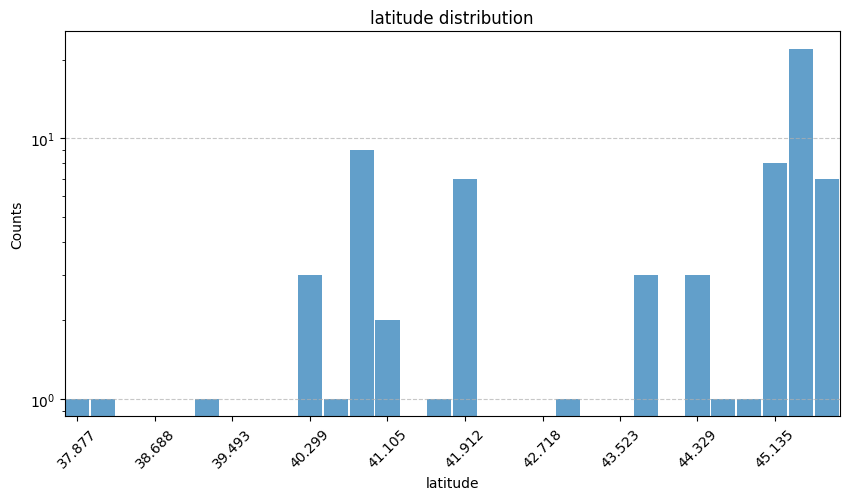

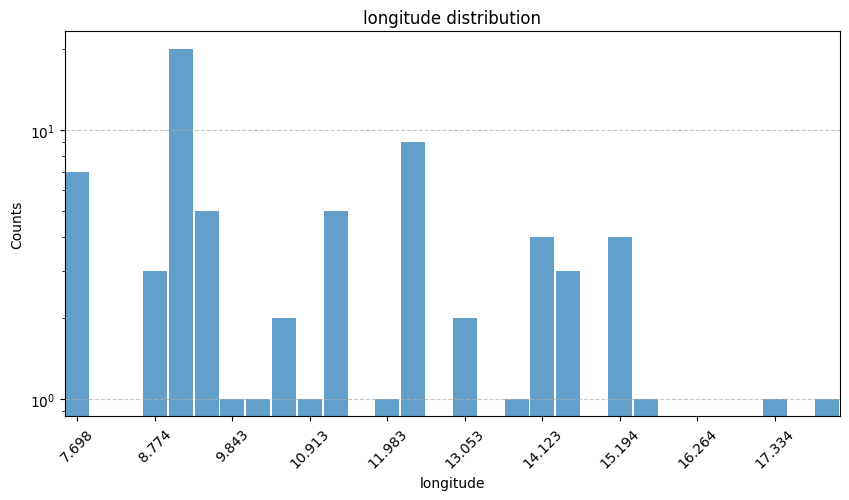

In [59]:
for feature in df_artists.columns:
    if pd.api.types.is_numeric_dtype(df_artists[feature]):
        plot_distrib(df_artists, feature)